A telecom company “Neo” whose customers are churning out to its
competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Importing data from excel file
data = pd.read_csv('customer_churn.csv')

In [93]:
# EDA part - Exploring data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
data.shape

(7043, 21)

#### Check info of dataset

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Check dataset for null values

In [96]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Stripping of white spaces in "String" datatype and replacing empty rows with null values

In [97]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].str.strip(' ')
        data[i] = data[i].replace('', None)

#### Check again for null values

In [98]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Getting null rows

In [99]:
null_rows = data[data.isnull().any(axis = 1)]

In [100]:
null_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,None,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,None,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,None,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,None,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,None,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,None,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,None,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,None,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,None,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,None,No


#### Deleting null rows as there are only a few them present

In [101]:
data.dropna(inplace = True)

In [102]:
data.shape

(7032, 21)

#### Check and change the column data type if it is wrong

In [103]:
data.TotalCharges = data.TotalCharges.astype('float').round(2)

In [104]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Check for outliers

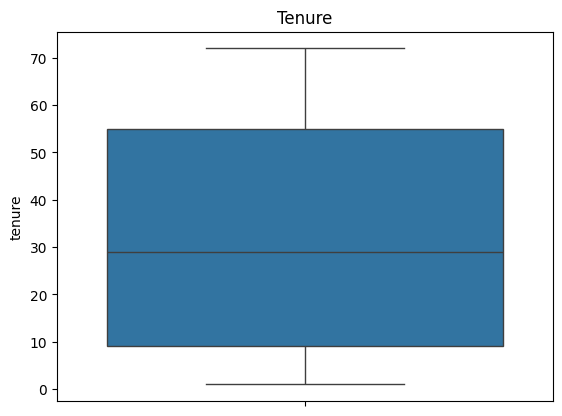

In [105]:
sns.boxplot(data.tenure).set_title('Tenure')
plt.show()

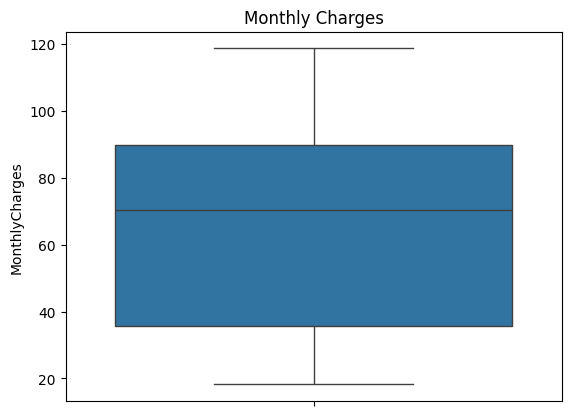

In [106]:
sns.boxplot(data.MonthlyCharges).set_title('Monthly Charges')
plt.show()

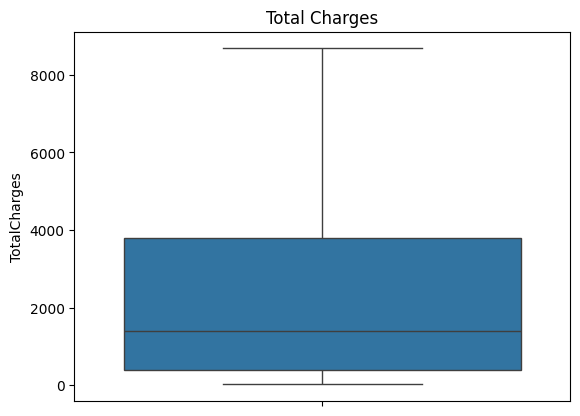

In [107]:
sns.boxplot(data.TotalCharges).set_title('Total Charges')
plt.show()

### 1. Data Manipulation

In [108]:
customer_5 = data.iloc[4]

In [109]:
customer_5

customerID                9237-HQITU
gender                        Female
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                             2
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                  70.7
TotalCharges                  151.65
Churn                            Yes
Name: 4, dtype: object

In [110]:
customer_15 = data.iloc[14]

In [111]:
customer_15

customerID                5129-JLPIS
gender                          Male
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                            25
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                   Yes
OnlineBackup                      No
DeviceProtection                 Yes
TechSupport                      Yes
StreamingTV                      Yes
StreamingMovies                  Yes
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 105.5
TotalCharges                 2686.05
Churn                             No
Name: 14, dtype: object

In [112]:
# Extract all the male senior citizens whose Payment Method is Electronic check

In [113]:
senior_male_electonic = data[(data.gender == 'Male') & (data.SeniorCitizen == 1) & (data.PaymentMethod == 'Electronic check')]

In [114]:
senior_male_electonic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [115]:
customer_total_tenure = data[(data.tenure > 70) | (data.MonthlyCharges > 100)]

In [116]:
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


In [117]:
data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [118]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [119]:
data.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [120]:
# Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes

In [121]:
two_mail_yes = data[(data.Contract == 'Two year') & (data.PaymentMethod == 'Mailed check') & (data.Churn == 'Yes')]

In [122]:
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [123]:
customer_333 = data.sample(n = 333) #picking random rows

In [124]:
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4102,1919-RTPQD,Male,0,Yes,Yes,7,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.75,333.65,No
331,9498-FIMXL,Female,0,No,No,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.20,161.95,No
3856,6710-HSJRD,Male,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,114.10,7132.15,No
1993,9828-AOQLM,Female,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.70,45.70,Yes
5450,7503-ZGUZJ,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.65,84.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,4501-EQDRN,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.70,69.70,Yes
6215,2446-BEGGB,Female,1,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.25,560.60,Yes
2132,6082-OQFBA,Male,0,Yes,Yes,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,436.90,No
2800,0519-DRGTI,Female,0,Yes,Yes,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,442.60,No


In [125]:
Churn = data.Churn.value_counts()

In [126]:
Churn

Churn
No     5163
Yes    1869
Name: count, dtype: int64

### 2. Data Visualzation

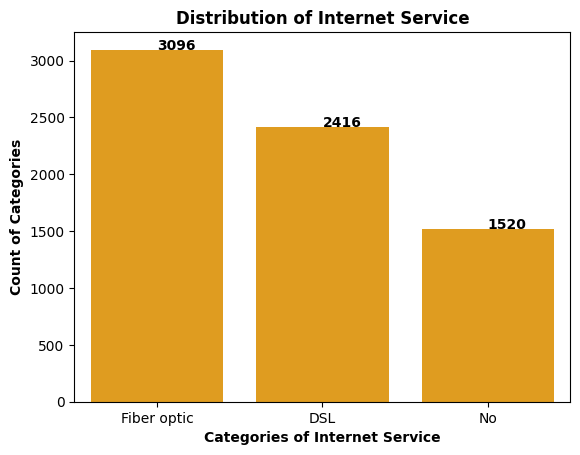

In [127]:
internet = data.InternetService.value_counts().keys()
counts = data.InternetService.value_counts()
sns.barplot(x = internet, y =  counts, color = 'orange')
for index, value in enumerate(list(counts)):
    plt.text(index, value,
            str(value), fontweight = 'bold')
plt.xlabel('Categories of Internet Service', fontweight = 'bold')
plt.ylabel('Count of Categories', fontweight = 'bold')
plt.title('Distribution of Internet Service', fontweight = 'bold')
plt.show()

Conclusion - Mostly of out customer are using Fiber optics Internet service

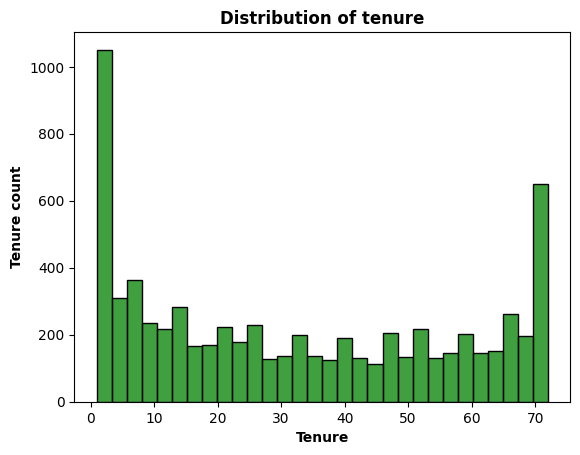

In [128]:
sns.histplot(data.tenure, bins = 30, color = 'green')
plt.title('Distribution of tenure', fontweight = 'bold')
plt.xlabel('Tenure', fontweight = 'bold')
plt.ylabel('Tenure count', fontweight = 'bold')
plt.show()

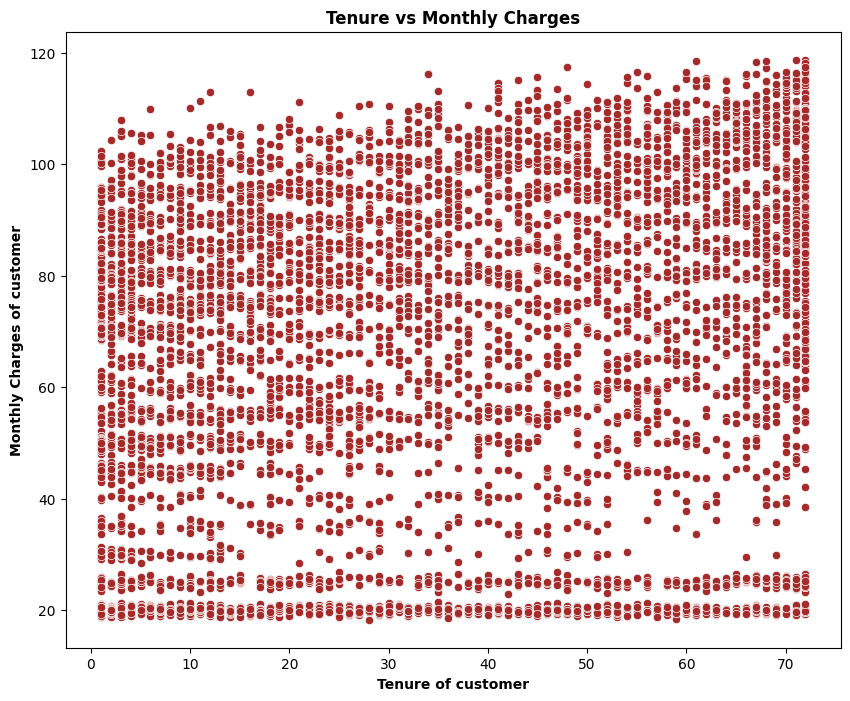

In [129]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = data.tenure, y = data.MonthlyCharges, color = 'brown')
plt.xlabel('Tenure of customer', fontweight = 'bold')
plt.ylabel('Monthly Charges of customer', fontweight = 'bold')
plt.title('Tenure vs Monthly Charges', fontweight = 'bold')
plt.show()

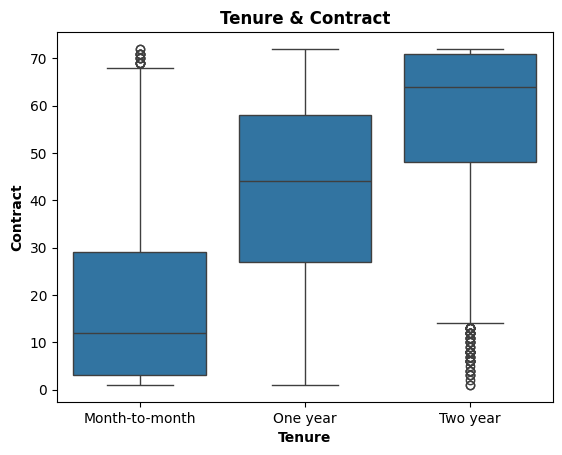

In [130]:
sns.boxplot(x = data.Contract, y = data.tenure)
plt.xlabel('Tenure', fontweight = 'bold')
plt.ylabel('Contract', fontweight = 'bold')
plt.title('Tenure & Contract', fontweight = 'bold')
plt.show()

#### Feature selection

In [131]:
df = data.copy()

In [132]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
df.drop(columns = ['customerID'], inplace = True)

In [134]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [136]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [137]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


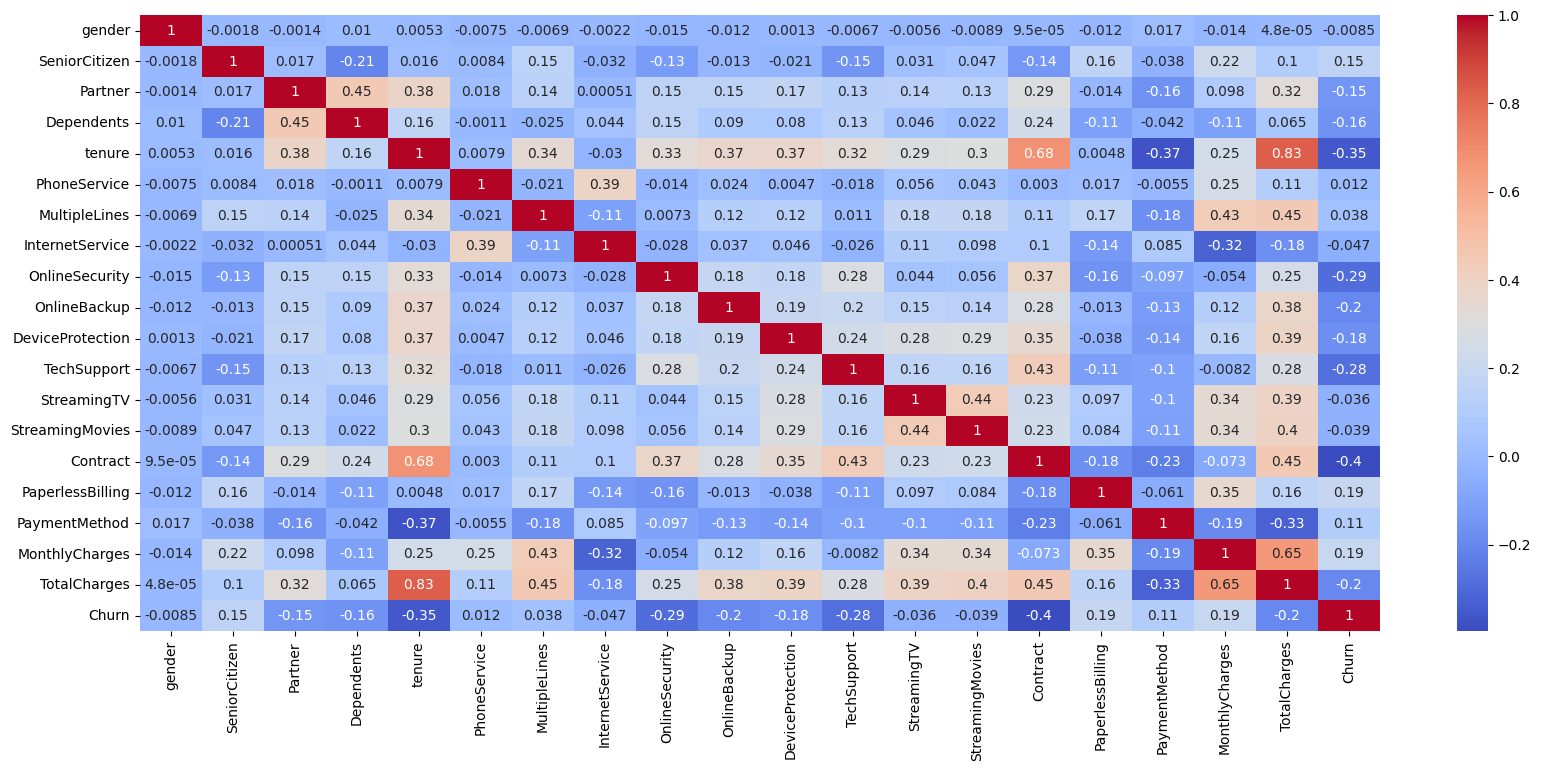

In [138]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [139]:
df.gender.unique()

array([0, 1])

In [140]:
# Applying VIF to select only the important columns for ML Model building

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

for i in df.columns:
    if i != 'Churn':
        col_list.append(i)

In [142]:
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i)
                  for i in range(len(x.columns))]

In [143]:
print(vif_data)

            features        VIF
0             gender   1.954535
1      SeniorCitizen   1.369954
2            Partner   2.819229
3         Dependents   1.957360
4             tenure  15.084412
5       PhoneService  15.150758
6      MultipleLines   2.756988
7    InternetService   4.350001
8     OnlineSecurity   2.247863
9       OnlineBackup   2.455913
10  DeviceProtection   2.629892
11       TechSupport   2.381046
12       StreamingTV   3.237958
13   StreamingMovies   3.265595
14          Contract   4.194484
15  PaperlessBilling   2.875010
16     PaymentMethod   3.095143
17    MonthlyCharges  20.503844
18      TotalCharges  13.869098


In [144]:
drop_columns  = list(vif_data.features[vif_data.VIF > 5])

In [145]:
drop_columns # Columns with high multi collinearity

['tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges']

In [146]:
df.drop(columns = drop_columns, axis = 1, inplace = True)

In [147]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,1


In [148]:
df.shape

(7032, 16)

# Machine learning Models to predict whether the customer will churn out or not

### 3. Model Building

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [150]:
x = df.drop(columns = ['Churn'], axis = 1)
y = df.Churn

#### Splitting data into Train and Test

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [152]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train shape: (4922, 15)
y_train shape: (4922,)
x_test.shape: (2110, 15)
y_test.shape: (2110,)


#### Linear Regression Model

In [153]:
lir = LinearRegression()

In [154]:
lir.fit(x_train, y_train)

LinearRegression()

In [155]:
lir_predict = lir.predict(x_test)

In [156]:
print('R-sq value:', round(metrics.r2_score(y_test, lir_predict), 2))
print('Mean absolute precentage error:', round(metrics.mean_absolute_percentage_error(y_test, lir_predict), 2))
print('Root mean squared error:', round(np.sqrt(metrics.mean_squared_error(y_test, lir_predict)), 2))

R-sq value: 0.21
Mean absolute precentage error: 795338563375342.2
Root mean squared error: 0.39


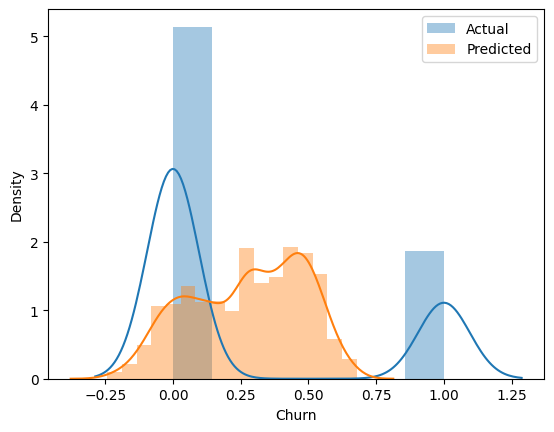

In [157]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(lir_predict, label = 'Predicted')
plt.legend()
plt.show()

#### Logistic Regression Model

In [158]:
lor = LogisticRegression()

In [159]:
lor.fit(x_train, y_train)

LogisticRegression()

In [160]:
lor_predict = lor.predict(x_test)

In [161]:
print('R-sq value:', round(metrics.r2_score(y_test, lor_predict), 2))
print('Mean absolute precentage error:', round(metrics.mean_absolute_percentage_error(y_test, lor_predict), 2))
print('Root mean squared error:', round(np.sqrt(metrics.mean_squared_error(y_test, lor_predict)), 2))

R-sq value: -0.15
Mean absolute precentage error: 377790110921600.94
Root mean squared error: 0.47


In [162]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, lor_predict)
print(f"Model accuracy on test set: {accuracy:.4f}")  # Format to 4 decimal places

Model accuracy on test set: 0.7758


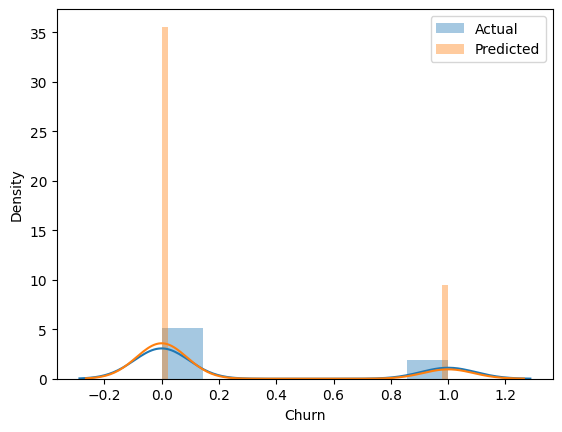

In [163]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(lor_predict, label = 'Predicted')
plt.legend()
plt.show()

#### Decision Tree Classification model

In [164]:
dtc = DecisionTreeClassifier()

In [165]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [166]:
dtc_predict = dtc.predict(x_test)

In [167]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, dtc_predict)
print(f"Model accuracy on test set: {accuracy:.4f}")  # Format to 4 decimal places

Model accuracy on test set: 0.7118


In [168]:
print('R-sq value:', round(metrics.r2_score(y_test, dtc_predict), 2))
print('Mean absolute precentage error:', round(metrics.mean_absolute_percentage_error(y_test, dtc_predict), 2))
print('Root mean squared error:', round(np.sqrt(metrics.mean_squared_error(y_test, dtc_predict)), 2))

R-sq value: -0.48
Mean absolute precentage error: 633918999682008.2
Root mean squared error: 0.54


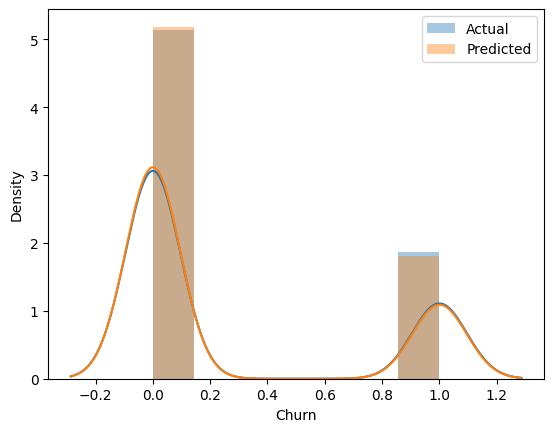

In [169]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(dtc_predict, label = 'Predicted')
plt.legend()
plt.show()

#### Random Forest Model

In [170]:
rfc = RandomForestClassifier(n_estimators=30)

In [171]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30)

In [172]:
rfc_predict = rfc.predict(x_test)

In [173]:
print('R-sq value:', round(metrics.r2_score(y_test, rfc_predict), 2))
print('Mean absolute precentage error:', round(metrics.mean_absolute_percentage_error(y_test, rfc_predict), 2))
print('Root mean squared error:', round(np.sqrt(metrics.mean_squared_error(y_test, rfc_predict)), 2))

R-sq value: -0.26
Mean absolute precentage error: 450359962737049.75
Root mean squared error: 0.49


In [174]:
# Accuracy score of Randm forest model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, rfc_predict)
print(f"Model accuracy on test set: {accuracy:.4f}")  # Format to 4 decimal places

Model accuracy on test set: 0.7550


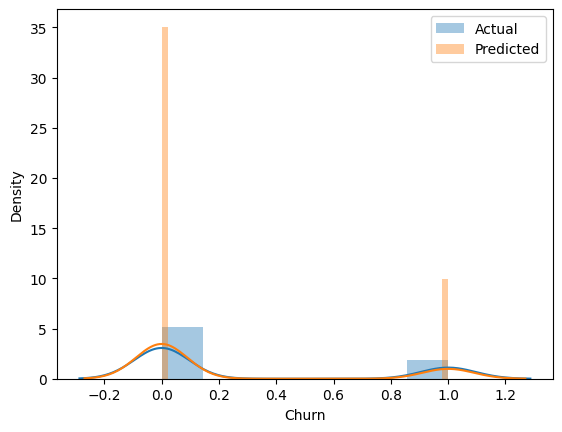

In [175]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(rfc_predict, label = 'Predicted')
plt.legend()
plt.show()

# Final Conclusion on ML models-

This project explored the effectiveness of various machine learning models for predicting customer churn at Neo Telecom. Our analysis revealed the following key findings:

**Logistic Regression Model**: Achieved the highest accuracy of 76% in predicting churn. This indicates that logistic regression effectively identifies patterns in customer data that are indicative of churn risk.


By adopting a comprehensive approach to model selection, evaluation, and interpretation, Neo Telecom can leverage machine learning to gain valuable insights into customer churn, implement targeted retention strategies, and ultimately improve customer lifetime value.

In [176]:
# Thank You